<a href="https://colab.research.google.com/github/MeryemSulkhayeva/MeryemSulkhayeva/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K_Means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster  import KMeans
from sklearn.datasets import make_blobs

# extra code - the exact arguments of make_blobs() are not important
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8],
                        [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

#std=standard devision(kenara cixan data)
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

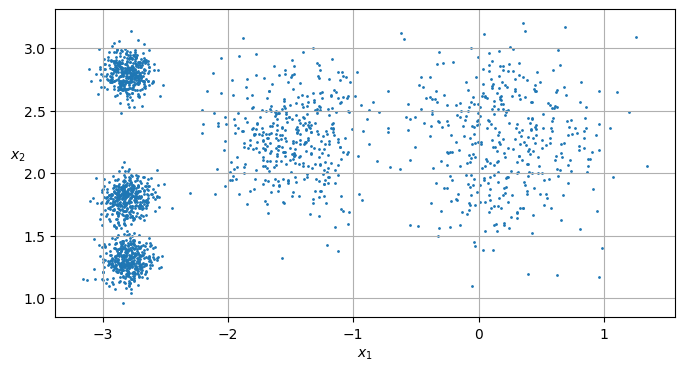

In [ ]:
def plot_clusters(X, y=None):
  plt.scatter(X[:,0], X[:,1], c=y, s=1)
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$', rotation=0)

plt.figure(figsize=(8,4))
plot_clusters(X)
plt.grid()
plt.show()

In [ ]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

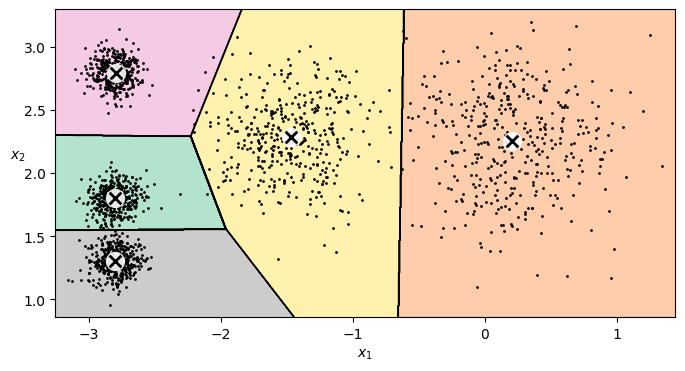

In [ ]:
def plot_data(X):
   plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
   if weights is not None:
       centroids = centroids[weights > weights.max() / 10]
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
   mins = X.min(axis=0) - 0.1
   maxs = X.max(axis=0) + 0.1
   xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
   Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)


   plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
   plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
   plot_data(X)
   if show_centroids:
       plot_centroids(clusterer.cluster_centers_)


   if show_xlabels:
       plt.xlabel("$x_1$")
   else:
       plt.tick_params(labelbottom=False)
   if show_ylabels:
       plt.ylabel("$x_2$", rotation=0)
   else:
       plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [ ]:
kmeans.transform(X_new).round(2)
# x_new in her klastirdan ne qeder uzaqda oldugunu gosterir

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

#The K-Means Algorithm

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
# n_clusters=k
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

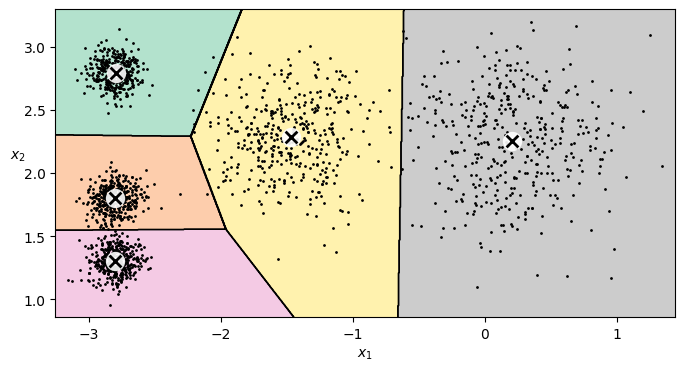

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

In [ ]:
kmeans.inertia_
#her klasterin ortalamasini, sonra onlarinda ortalamasini tapir(mesafe az olsa daha yaxsidi)

211.5985372581684

In [ ]:
kmeans.score(X)

-211.59853725816836

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init='random', n_init=10,
                             random_state=2)
# n_init(sehv yerde baslasa tezden baslat-10 defe)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

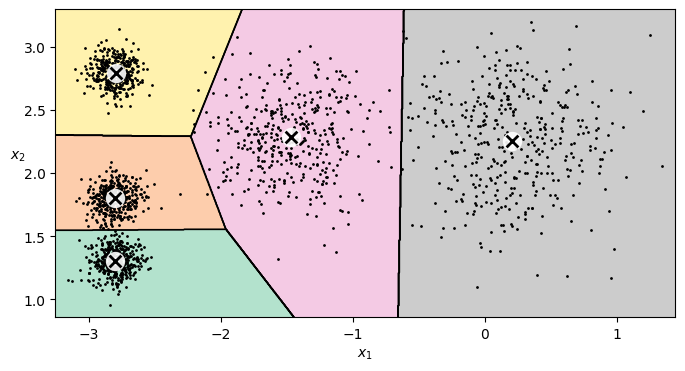

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [ ]:
kmeans_rnd_10_inits.inertia_

211.5985372581684

#Mini-Batch K-Means
(datanin miqdari cox olsa ist elemek olar)

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [ ]:
minibatch_kmeans.inertia_

211.65239850433215

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
# ald shift asagi
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)

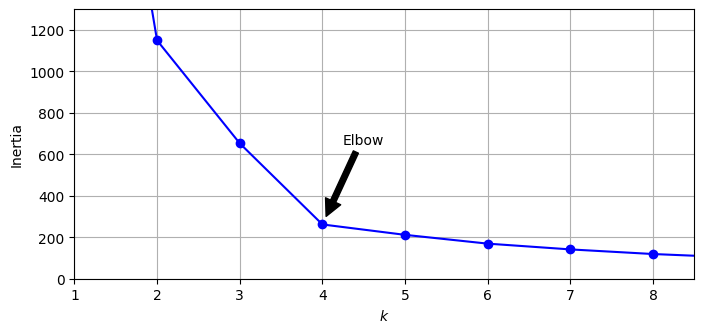

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range (1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1,10), inertias, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Inertia')
plt.annotate('', xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, 'Elbow', horizontalalignment='center')
plt.axis([1, 8.5, 0, 1300])
plt.grid()
plt.show()

#Limit of K-Means

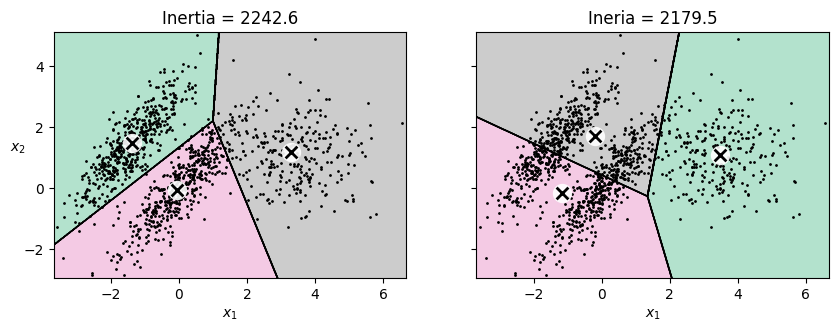

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4),(0, 0)), random_state=42)
X1= X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]   #np.r(2 arrayi birlesdirir)
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f'Inertia = {kmeans_good.inertia_:.1f}')

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f'Ineria = {kmeans_bad.inertia_:.1f}')

plt.show()

In [ ]:
X1

array([[ 0.81672911,  1.32719052],
       [ 0.28671649,  1.30485269],
       [-1.89804675, -0.00869803],
       ...,
       [-0.6384584 ,  2.03202156],
       [-1.37328012, -1.74808556],
       [-1.22397356,  2.59592324]])

In [ ]:
import PIL

image = np.asarray(PIL.Image.open('/content/ladybug.png'))
image.shape

(533, 800, 3)

array([[[ 25,  29,   2],
        [ 24,  28,   1],
        [ 24,  29,   0],
        ...,
        [ 57, 105,  21],
        [ 56, 103,  22],
        [ 52,  99,  19]],

       [[ 24,  28,   1],
        [ 23,  27,   0],
        [ 23,  27,   0],
        ...,
        [ 60, 108,  22],
        [ 59, 106,  25],
        [ 55, 102,  22]],

       [[ 23,  27,   2],
        [ 22,  26,   1],
        [ 22,  26,   0],
        ...,
        [ 66, 114,  28],
        [ 63, 111,  27],
        [ 58, 105,  24]],

       ...,

       [[ 14,  18,   1],
        [ 14,  18,   1],
        [ 13,  20,   2],
        ...,
        [ 13,  61,   3],
        [  9,  56,   2],
        [  5,  51,   2]],

       [[ 14,  18,   1],
        [ 14,  18,   1],
        [ 12,  19,   1],
        ...,
        [ 11,  59,   1],
        [  7,  54,   0],
        [  3,  49,   0]],

       [[ 13,  17,   0],
        [ 13,  17,   0],
        [ 11,  18,   0],
        ...,
        [ 10,  58,   0],
        [  5,  52,   0],
        [  2,  48,   0]]], dtype=uint8)
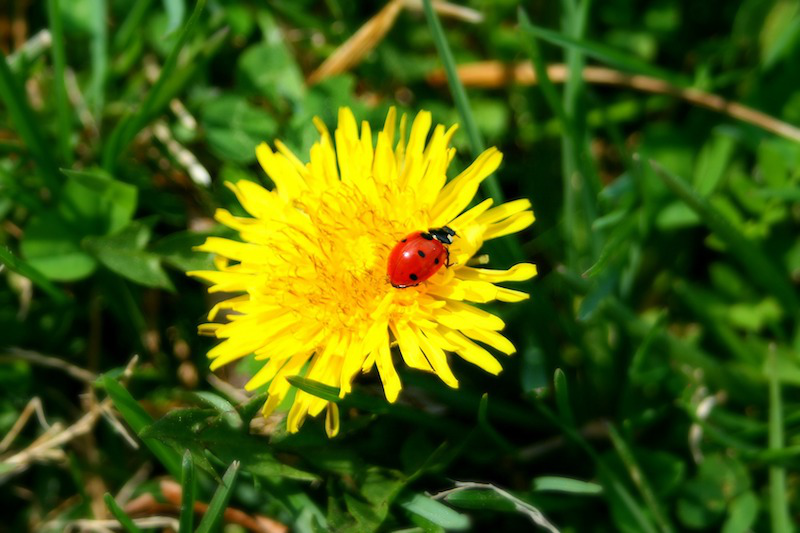

In [ ]:
image

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [ ]:
kmeans.cluster_centers_

array([[250.80339083, 238.65268971,   6.56603259],
       [  5.83448628,  28.22616668,   1.47552886],
       [ 55.88206518,  98.62346563,  14.79208777],
       [193.20797818,  54.13433345,  11.37470167],
       [ 25.47759236,  64.83281062,   4.31953567],
       [156.22887957, 160.67579389,  98.81396046],
       [ 94.89017515, 133.51803159,  40.11328915],
       [225.57151644, 185.02493849,   8.77650414]])

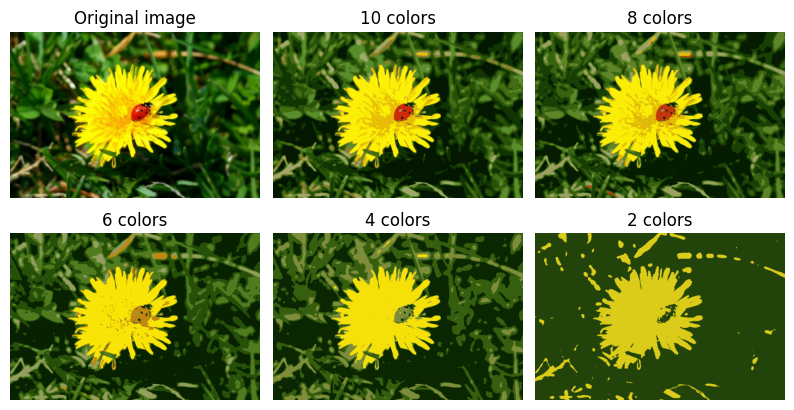

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
  plt.subplot(2, 3, 2 + idx)
  plt.imshow(segmented_imgs[idx] / 255)
  plt.title(f"{n_clusters} colors")
  plt.axis('off')

plt.show()

#Using Clustering for Semi_Supervised Learning

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [ ]:
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

In [ ]:
X_digits_dist[0]

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)   #mesafe(dist)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

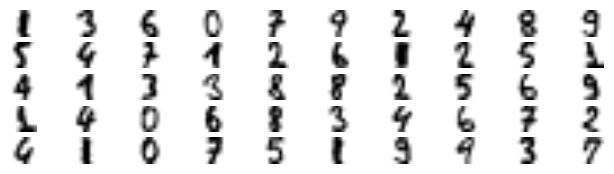

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(k // 10, 10, index + 1)   #//(reqem gosterir)
  plt.imshow(X_representative_digit.reshape(8, 8), cmap='binary',
             interpolation='bilinear')      #yanindaki ile uygunlasdirir
  plt.axis("off")

plt.show()

In [ ]:
y_representative_digits = np.array([
    1, 3, 6, 0, 7, 9, 2, 4, 8, 9,
    5, 4, 7, 1, 2, 6, 1, 2, 5, 1,
    4, 1, 3, 3, 8, 8, 2, 5, 6, 9,
    1, 4, 0, 6, 8, 3, 4, 6, 7, 2,
    4, 1, 0, 7, 5, 1, 9, 9, 3, 7
])

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
  y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]
# 0ci qiymeti 1e, 1ci qiymeti 3e, 2ci qiymeti 6a brb ele

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.8942065491183879

In [ ]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1
# qalan 1 faizi -1e brb ele
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9093198992443325

In [ ]:
y_train_partially_propagated == y_train[partially_propagated]

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9755555555555555

#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
dbscan.labels_[:10]
# -1 ler anamony(kenarda olanlar)

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
dbscan.core_sample_indices_[:10]
# indeks

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

#Gaussian Mixtures

In [ ]:
X1, y1 = make_blobs(n_samples=1000,centers = ((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250,centers = 1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
gm.weights_
# merkezlerin dogruluqu

array([0.39025715, 0.40007391, 0.20966893])

In [ ]:
gm.means_
# merkezlerin koordinat

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [ ]:
gm.covariances_
# siqma

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [ ]:
gm.n_iter_

4

In [ ]:
gm.predict(X)
# texmin ele

array([0, 0, 1, ..., 2, 2, 2])

In [ ]:
gm.predict_proba(X).round(3)
# faizi, active learning

array([[0.977, 0.   , 0.023],
       [0.983, 0.001, 0.016],
       [0.   , 1.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ]])

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [ ]:
y_new

array([0, 0, 1, 2, 2, 2])

In [ ]:
#Cluster the

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [ ]:
olivetti = fetch_olivetti_faces()
# data_home=None,
# shuffle=False,
# random_state=0,
# download_if_missing=True,
# return_X_y=False

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [ ]:
olivetti.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
# test uzerinde ezberlemesin deye valid edirik, test ile traini valid de toplayiriq
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [ ]:
strat_split.split(olivetti.data, olivetti.target)

<generator object BaseShuffleSplit.split at 0x7d911213c7b0>

In [ ]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [ ]:
from sklearn.cluster import KMeans
k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
  print(f'k={k}')
  kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)   #n_init(10 defe yoxla)
  kmeans.fit(X_train_pca)
  kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


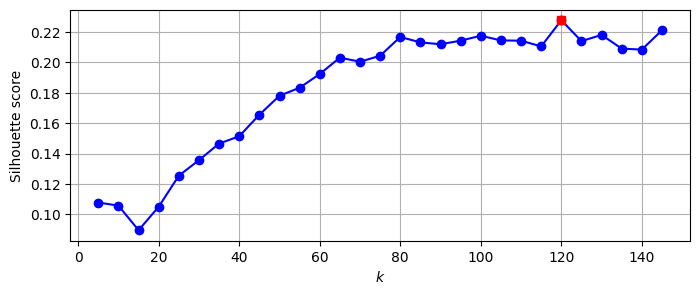

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.plot(best_k, best_score, 'rs')
plt.grid()
plt.show()

In [ ]:
best_k

120

In [ ]:
best_model = kmeans_per_k[best_index]

#Using Clustering as Preprocessing for Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)
# en axirda test gormek isteyirik deye validi score edirik

0.925

In [ ]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
clf.score(X_valid_reduced, y_valid)

0.7

In [ ]:
from sklearn.pipeline import make_pipeline



In [ ]:
extended birlesdirir noqte ile pixcel

#A Gaussian Mixture Model for the Olivetti Faces Dataset

In [ ]:
# 20 sample yarat
# pca 1000den 10a azalda bilir, data itir; inverse qaytarir 196dan 4mine

In [ ]:
#Using Dimensionality